<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Week 23 Class 2 03/02</h1>
</div>

## Objectives for this week:
* Reviewing concepts we've covered

## Todays Agenda
* Reviewing visualizations


<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Homework Presentations?</h1>
</div>

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Clustering Example</h1>
</div>

https://www.youtube.com/watch?v=4b5d3muPQmA

This is the "Iris" dataset. Originally published at [UCI Machine Learning Repository: Iris Data Set](https://archive.ics.uci.edu/ml/datasets/Iris), this small dataset from 1936 is often used for testing out machine learning algorithms and visualizations (for example, [Scatter Plot](http://bl.ocks.org/curran/9e04ccfebeb84bcdc76c)). Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.

<ipython-input-1-3a17cbdac6f7>:84: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


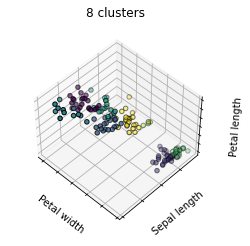

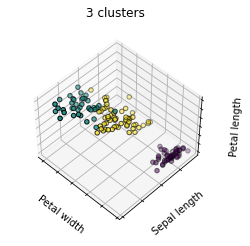

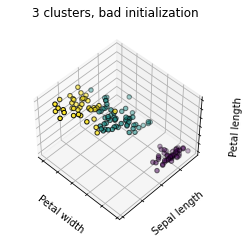

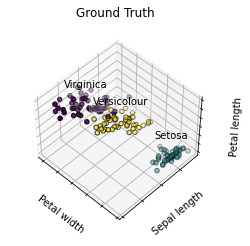

In [1]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

# import KMeans from cluster module
from sklearn.cluster import KMeans

# import datasets included in sklearn
from sklearn import datasets

# this seeds our PRNG so our random numbers
# aren't random
np.random.seed(5)

# loads the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# we're going to run 3 different versions of our KMeans
# one with 8 clusters
# one with 3 clusters
# one with 1 to 3 clusters initialized randomly and 
# meant to try a few different numbers and pick the best
estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

# Now we set up a chart for our results
# we'll make 3 for each run of our KMeans algorithm
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the real clustering
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Types of Charts</h1>
</div>

# Line Charts

A line graph, also known as a line chart, is a type of chart used to visualize the value of something over time.

In [3]:
df = pd.read_csv('../datasets/SNAP_history_1969_2019.csv')
df.head()

,Fiscal Year,Average Participation,Average Benefit Per Person,Total Benefits(M),Other Costs,Total Costs(M)
0,1969,2878.0,6.63,228.8,21.7,250.5
1,1970,4340.0,10.55,549.7,27.2,576.9
2,1971,9368.0,13.55,1522.7,53.2,1575.9
3,1972,NaN,13.48,1797.3,69.4,NaN
4,1973,12166.0,14.60,2131.4,76.0,2207.4


### In pandas (using matplotlib)

<AxesSubplot:>

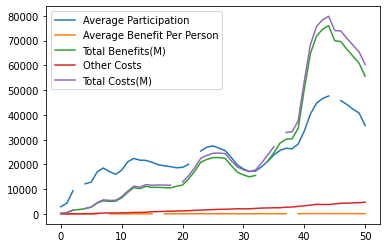

In [4]:
df.plot()

# Bar Charts

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a column chart. 

A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value. Some bar graphs present bars clustered in groups of more than one, showing the values of more than one measured variable. 

### In pandas (using matplotlib)

In [5]:
df = pd.read_csv('../datasets/covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


<AxesSubplot:ylabel='Country/Region'>

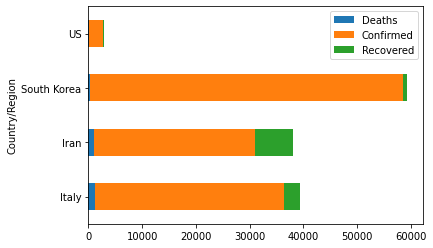

In [6]:
df.groupby('Country/Region')[['Deaths', 'Confirmed', 'Recovered']].sum().sort_values(by='Deaths',ascending=False)[1:5].plot.barh(stacked=True)

**above explained:**

Let's group the dataframe rows by country/region
```python
df.groupby('Country/Region')
```
Then take the columns ['Deaths', 'Confirmed, 'Recovered']

```python
[['Deaths','Confirmed','Recovered']]
```

and sum them
```python
.sum()
```
then sort by deaths in descending order
```python
.sort_values(by='Deaths',ascending=False)
```
take 2nd to 6th rows so we skip China (check why)
```python
[1:5]
```
and then plot a horizontal bar chart making the columns stacked
```python
.plot.barh(stacked=True)
```

# Scatter Plots

A scatter plot (also called a scatterplot, scatter graph, scatter chart, scattergram, or scatter diagram) is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. If the points are coded (color/shape/size), one additional variable can be displayed. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

[source](https://en.wikipedia.org/wiki/Scatter_plot)

In [7]:
df = pd.read_csv('../datasets/heightsandweights.csv')
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


<AxesSubplot:xlabel='Height', ylabel='Weight'>

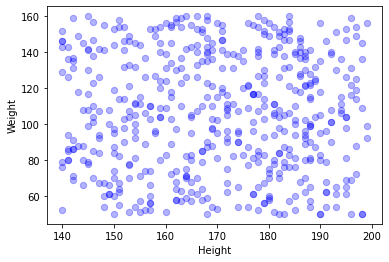

In [8]:
df.plot.scatter(x='Height',y='Weight', s=40, c='b', alpha=0.3)

# Boxplots

A boxplot is a graph that gives you a good indication of how the values in the data are spread out.

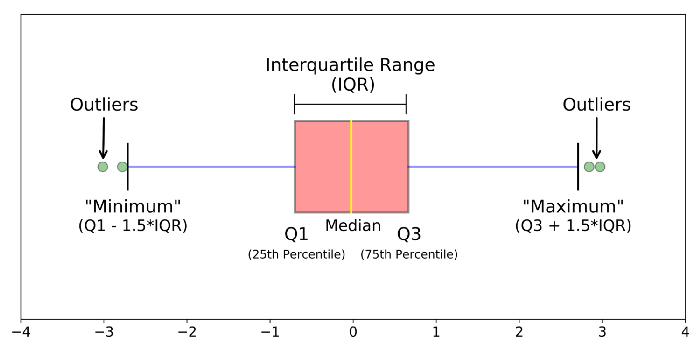

median (Q2/50th Percentile): the middle value of the dataset.

first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.

third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.

interquartile range (IQR): 25th to the 75th percentile.

whiskers (shown in blue)

outliers (shown as green circles)

“maximum”: Q3 + 1.5*IQR

“minimum”: Q1 -1.5*IQR

### Example

In [9]:
df = pd.read_csv('../datasets/grades.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<AxesSubplot:>

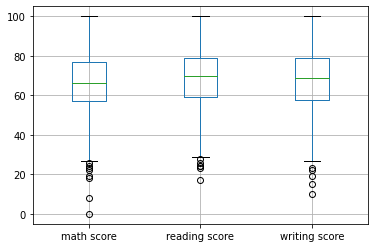

In [10]:
df.boxplot()

<AxesSubplot:>

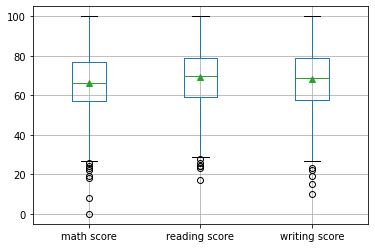

In [11]:
df.boxplot(showmeans=True)

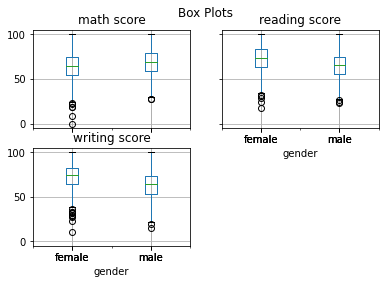

In [12]:
df.boxplot(column = ['math score','reading score','writing score'], by = 'gender');
plt.suptitle('Box Plots')
plt.show()

# Histograms

A histogram is an approximate representation of the distribution of numerical data. It was first introduced by Karl Pearson. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent and are often (but not required to be) of equal size.  
[source](https://en.wikipedia.org/wiki/Histogram)

In [13]:
df = pd.read_csv('../datasets/grades.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<AxesSubplot:>

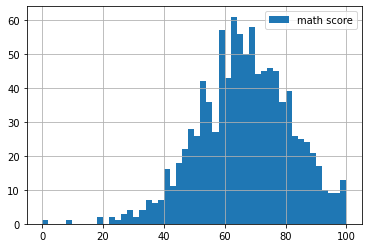

In [14]:
df['math score'].hist(bins=50, legend=True)

# Kernel Density Estimator

In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. 

[source](https://en.wikipedia.org/wiki/Kernel_density_estimation)

<AxesSubplot:ylabel='Density'>

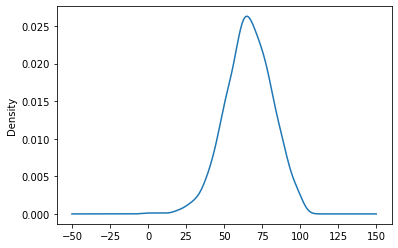

In [15]:
df['math score'].plot.kde()

<div style="background: #000;
            color: #FFF;
            margin-bottom: 10px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Charting with Matplotlib</h1>
</div>



Matplotlib graphs your data on [Figures](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure) (i.e., windows, Jupyter widgets, etc.), each of which can contain one or more [Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes) (i.e., an area where points can be specified in terms of x-y coordinates (or theta-r in a polar plot, or x-y-z in a 3D plot, etc.). The most simple way of creating a figure with an axes is using [pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots). We can then use [Axes.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot) to draw some data on the axes:

**Simple Example:**

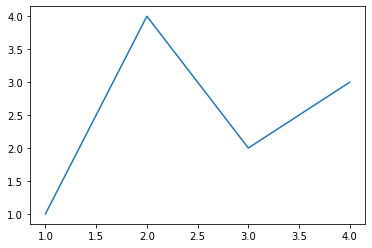

In [16]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.


Anatomy of a figure:
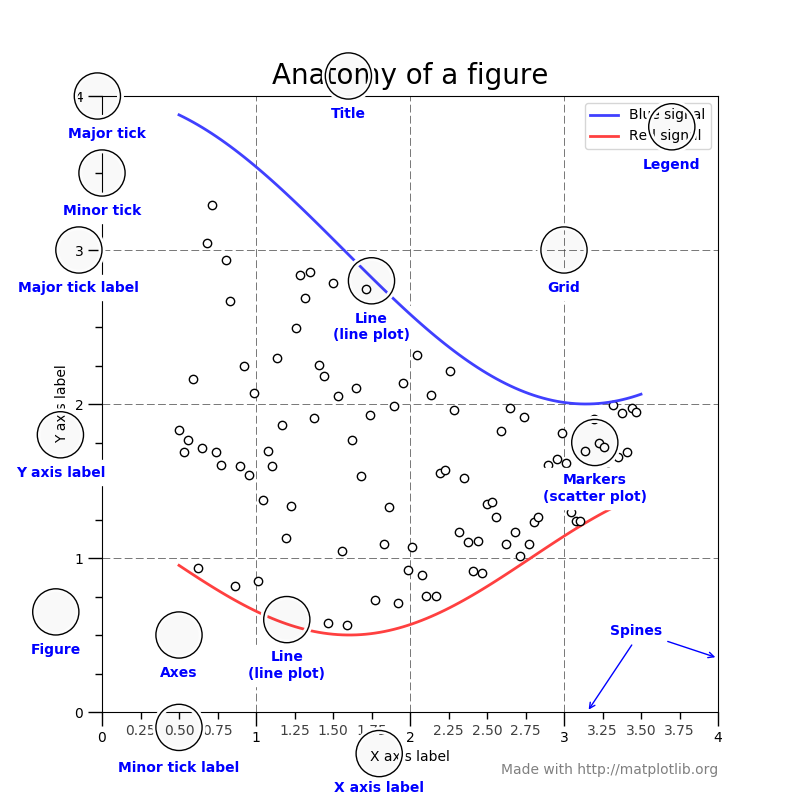

**Figure**

The whole figure. The figure keeps track of all the child [Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes), a smattering of 'special' artists (titles, figure legends, etc), and the canvas. (Don't worry too much about the canvas, it is crucial as it is the object that actually does the drawing to get you your plot, but as the user it is more-or-less invisible to you). A figure can contain any number of [Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes), but will typically have at least one.

The easiest way to create a new figure is with pyplot:
```
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
```
It's convenient to create the axes together with the figure, but you can also add axes later on, allowing for more complex axes layouts.

**Axes**

This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given [Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes) object can only be in one [Figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure). The Axes contains two (or three in the case of 3D) [Axis](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis) objects (be aware of the difference between **Axes** and **Axis**) which take care of the data limits (the data limits can also be controlled via the `axes.Axes.set_xlim()` and `axes.Axes.set_ylim()` methods). Each Axes has a title (set via `set_title()`), an x-label (set via `set_xlabel()`), and a y-label set via `set_ylabel()`).

The Axes class and its member functions are the primary entry point to working with the OO interface.

**Axis**

These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a [Locator](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Locator) object and the ticklabel strings are formatted by a [Formatter](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Formatter). The combination of the correct [Locator](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Locator) and [Formatter](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.Formatter) gives very fine control over the tick locations and labels.

**Artist**

Basically everything you can see on the figure is an artist (even the [Figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure), [Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes), and [Axis](https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis) objects). This includes Text objects, Line2D objects, collections objects, Patch objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the **canvas**. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.


### The TWO types of matplotlib plotting:
* Explicitly create figures and axes, and call methods on them (the "object-oriented (OO) style").
* Rely on pyplot to automatically create and manage the figures and axes, and use pyplot functions for plotting.

OO-Style:

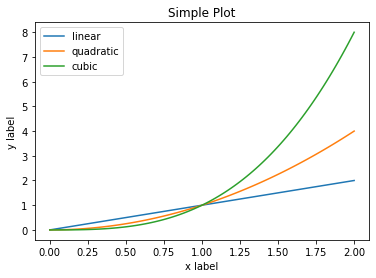

In [17]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

Pyplot-Style:

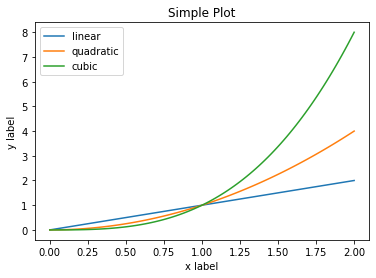

In [18]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

### Lifecycle of a Plot

Say we had the following data.

In [19]:
import numpy as np
import matplotlib.pyplot as plt


data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

Getting started

This data is naturally visualized as a barplot, with one bar per group. To do this with the object-oriented approach, we first generate an instance of figure.Figure and axes.Axes. The Figure is like a canvas, and the Axes is a part of that canvas on which we will make a particular visualization.

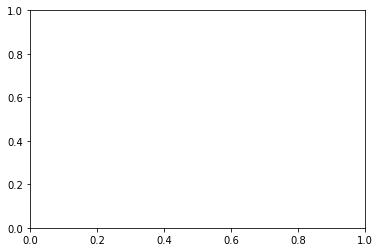

In [20]:
fig, ax = plt.subplots()

### Now that we have an Axes instance, we can plot on top of it.

<BarContainer object of 10 artists>

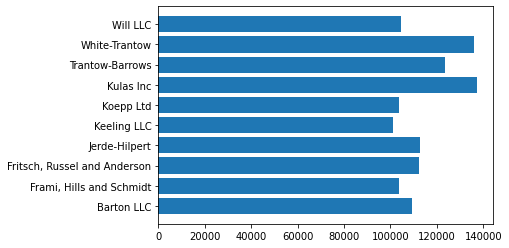

In [21]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

### Controlling the style

There are many styles available in Matplotlib in order to let you tailor your visualization to your needs. To see a list of styles, we can use style.

In [22]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<BarContainer object of 10 artists>

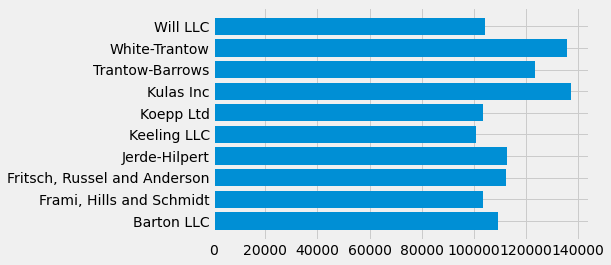

In [23]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

### Customizing the plot

Now we've got a plot with the general look that we want, so let's fine-tune it so that it's ready for print. First let's rotate the labels on the x-axis so that they show up more clearly. We can gain access to these labels with the axes.Axes.get_xticklabels() method:

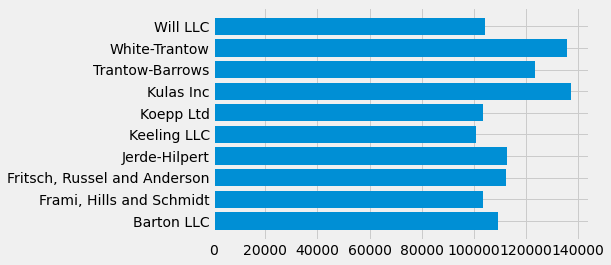

In [24]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()

If we'd like to set the property of many items at once, it's useful to use the pyplot.setp() function. This will take a list (or many lists) of Matplotlib objects, and attempt to set some style element of each one.

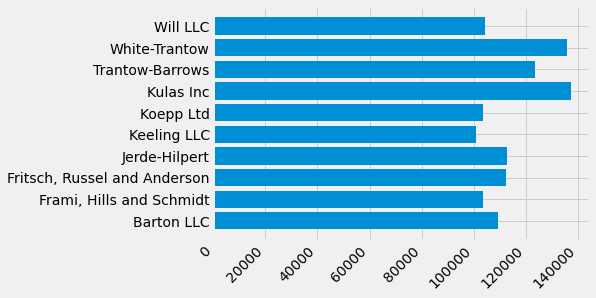

In [25]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
plt.show()

Next, we add labels to the plot. To do this with the OO interface, we can use the Artist.set() method to set properties of this Axes object.

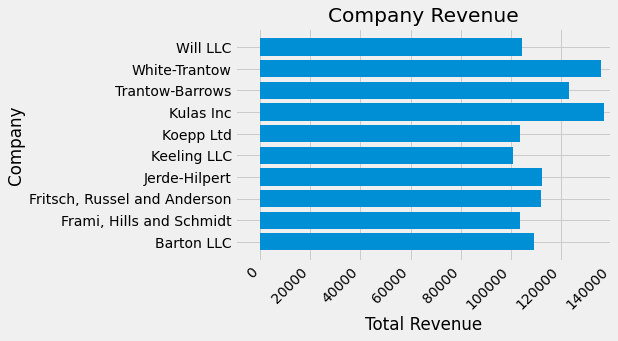

In [26]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
plt.show()

We can also adjust the size of this plot using the pyplot.subplots() function. We can do this with the figsize kwarg.

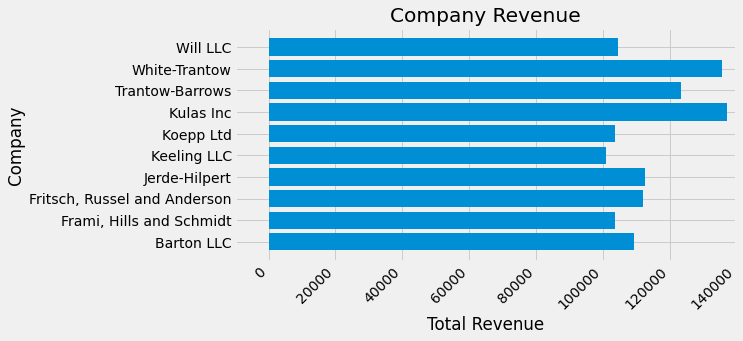

In [27]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
plt.show()

For labels, we can specify custom formatting guidelines in the form of functions. Below we define a function that takes an integer as input, and returns a string as an output. When used with `Axis.set_major_formatter` or `Axis.set_minor_formatter`, they will automatically create and use a `ticker.FuncFormatter` class.

For this function, the x argument is the original tick label and pos is the tick position. We will only use x here but both arguments are needed.

In [28]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

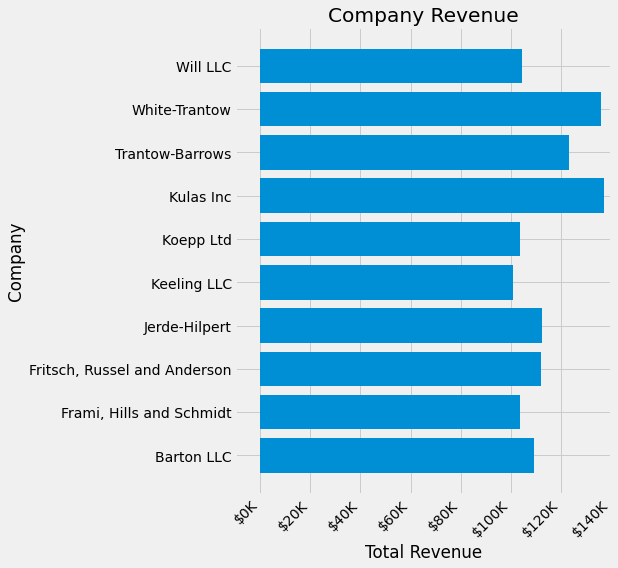

In [29]:
fig, ax = plt.subplots(figsize=(6, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(currency)

Combining multiple visualizations

It is possible to draw multiple plot elements on the same instance of axes.Axes. To do this we simply need to call another one of the plot methods on that axes object.



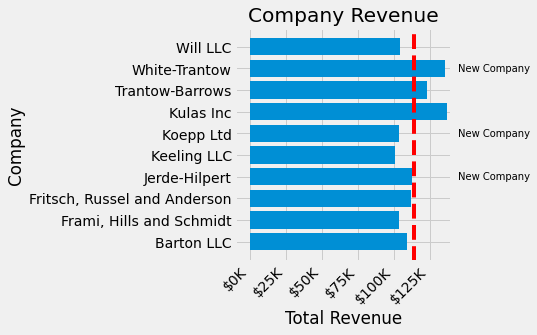

In [30]:
fig, ax = plt.subplots(figsize=(150, 4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Add a vertical line, here we set the style in the function call
ax.axvline(group_mean, ls='--', color='r')

# Annotate new companies
for group in [3, 5, 8]:
    ax.text(145000, group, "New Company", fontsize=10,
            verticalalignment="center")

# Now we move our title up since it's getting a little cramped
ax.title.set(y=1.05)

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(currency)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=.1)

plt.show()

# Doing the above in the pyplot way.

In [31]:
data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

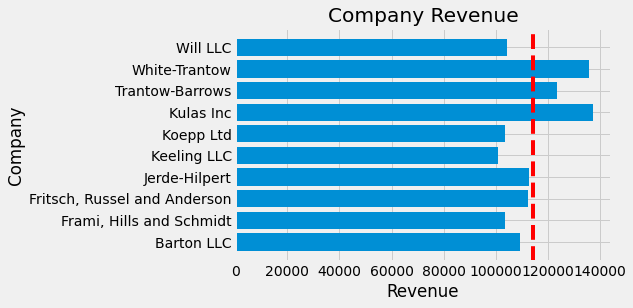

In [32]:
# we can do almost everything using plt
plt.title('Company Revenue')
plt.barh(group_names, group_data)
plt.xlabel('Revenue')
plt.ylabel('Company')
plt.axvline(group_mean, ls='--', color='r')
plt.setp(labels, rotation=45, horizontalalignment='right')
plt.xlim = [-10000, 140000]
plt.show()